# Q1

Use the given code and modify for IRIS dataset. Implement the SVM classifier in Python (make use
of scikit-learn library). Apply the linear kernel function. Plot the scatter plot of the input features. Plot
the decision boundary.

In [34]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import numpy as np

In [35]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [36]:
svm = SVC(kernel="linear", C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

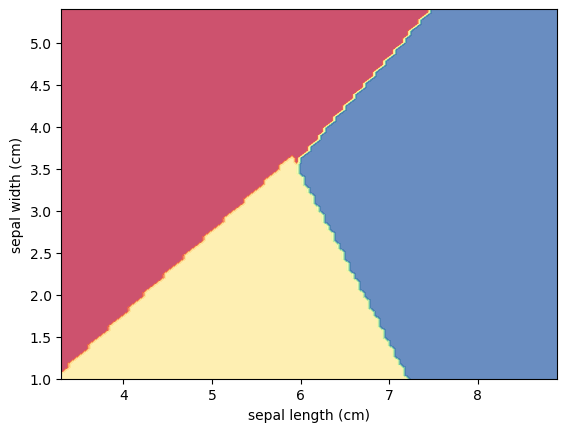

In [37]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

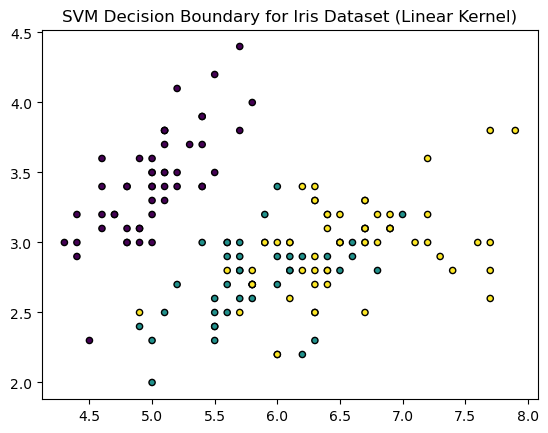

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.title("SVM Decision Boundary for Iris Dataset (Linear Kernel)")
plt.show()


# Q2

Construct a simple SVM classifier that separates the two classes:
Positively labeled data points: (4, 1), (4, -1), (6, 0)
Negatively labeled data points: (1, 0), (0, 1), (0, -1)
For all negatively labeled points, the output is -1, and for all positively labeled points, the output is 1.
Implement the python function program to draw the hyperplane that separates the two classes using
scikit-learn library. Plot the scatter plot of the input features

In [39]:
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])


In [40]:
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(kernel='linear')

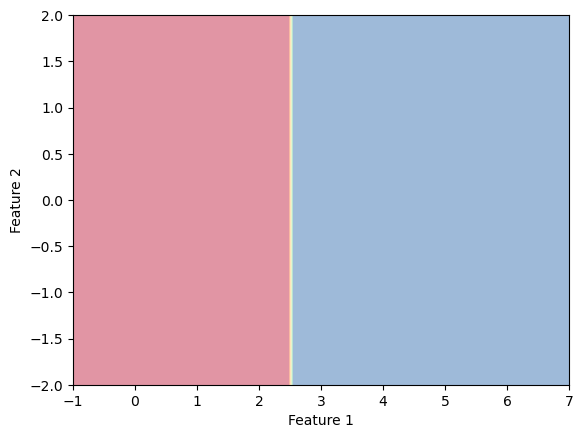

In [41]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.5,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

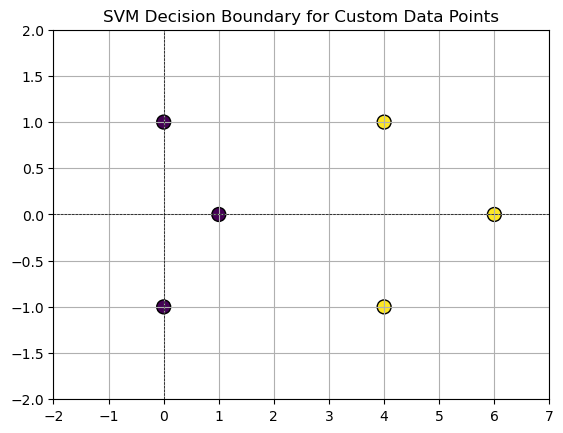

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')
plt.title("SVM Decision Boundary for Custom Data Points")
plt.xlim(-2, 7)
plt.ylim(-2, 2)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.show()

# Q3

Solve Qn (2) manually in your Observation book and implement without using scikit-learn library.

In [43]:
def fit_svm(X, y):
    pos = X[y == 1]
    neg = X[y == -1]
    mean_pos = np.mean(pos, axis=0)
    mean_neg = np.mean(neg, axis=0)
    w = mean_pos - mean_neg
    b = -0.5 * (np.dot(w, mean_pos) + np.dot(w, mean_neg))
    return w, b

In [44]:
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

In [45]:
w, b = fit_svm(X, y)

In [46]:
xx, yy = np.meshgrid(np.linspace(-2, 7, 100), np.linspace(-2, 2, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b).reshape(xx.shape)

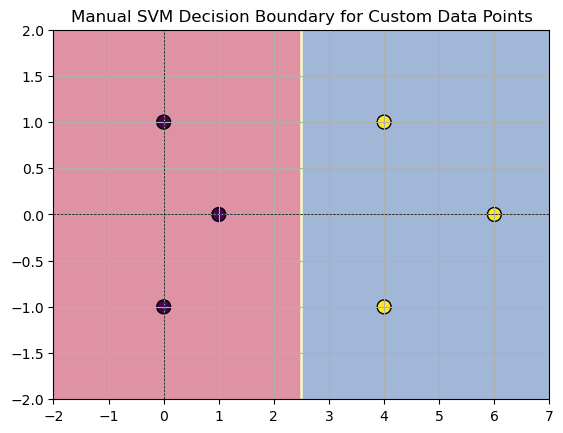

In [47]:
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')
plt.title("Manual SVM Decision Boundary for Custom Data Points")
plt.xlim(-2, 7)
plt.ylim(-2, 2)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.show()

# Q4

Develop a Python function program to sketch the hyperplane 1 + 2X1 + 3X2 = 0 without using scikit-
learn library. Indicate the set of points for which 1 + 3X1 − X2 > 0, 1 + 3X1 − X2 < 0 and 1 + 3X1 −
X2=0. Take x1, x2 ∈ (-10, 10). Plot the graph for every +/- 1 increment. Find the slope and intercept.
Solve manually in your Observation book. Compare your results with manual results

In [48]:
x1_range = np.arange(-10, 11, 1)
x2_range = np.arange(-10, 11, 1)

In [49]:
x1, x2 = np.meshgrid(x1_range, x2_range)

In [50]:
hyperplane1 = 1 + 2 * x1 + 3 * x2
inequality1 = 1 + 3 * x1 - x2

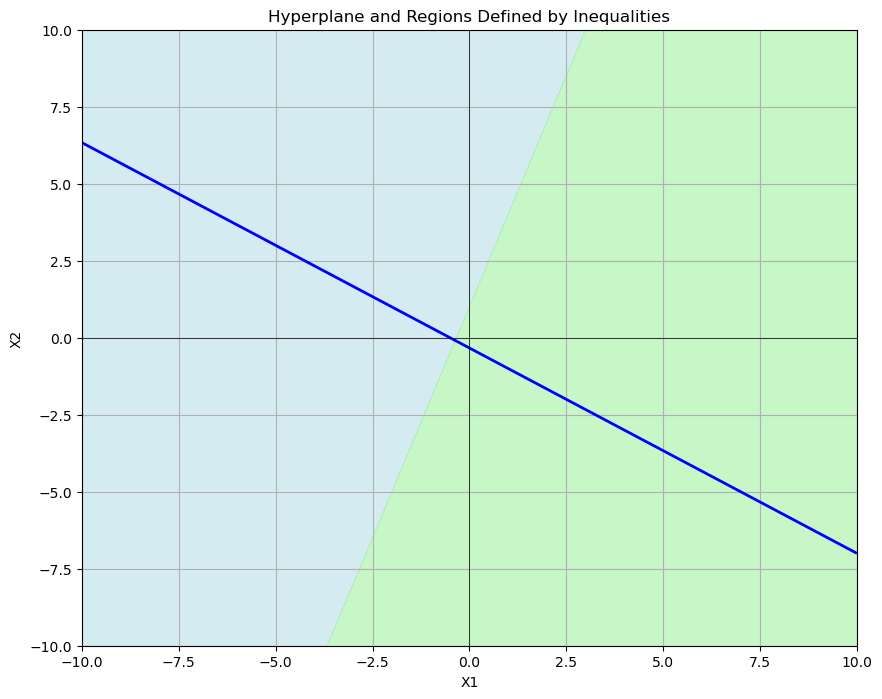

In [51]:
plt.figure(figsize=(10, 8))

plt.contour(x1, x2, hyperplane1, levels=[0], colors='blue', linewidths=2)
plt.contourf(x1, x2, inequality1, levels=[-1000, 0], colors='lightblue', alpha=0.5)
plt.contourf(x1, x2, inequality1, levels=[0, 1000], colors='lightgreen', alpha=0.5)

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Hyperplane and Regions Defined by Inequalities')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

# Q5
Given two hyperplanes for SVM classifier 1 and SVM classifier 2, find the best hyperplane
corresponding to the classifier:
a. 5+2x1+5x2
b. 5+20x1+50x2
Implement Python function program to draw the hyperplane that separates the two classes (without
scikit-learn library). Plot the scatter plot of the input features.
Indicate the set of points for which 5+2*x1+ 5*x2 > 0, 5+2*x1+ 5*x2 <0, and 5+2*x1+ 5*x2 = 0
On the same plot, Indicate the set of points for which 5+20*x1+50*x2 > 0, 5+20*x1+50*x2 < 0, and
5+20*x1+50*x2 =0.
Find the slope and intercept. Solve manually in your Observation book. Compare your results with
manual results.

In [52]:
x1_range = np.linspace(-10, 10, 400)
hyperplane1 = -2/5 * x1_range - 1
hyperplane2 = -2/5 * x1_range - 1/10

In [53]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

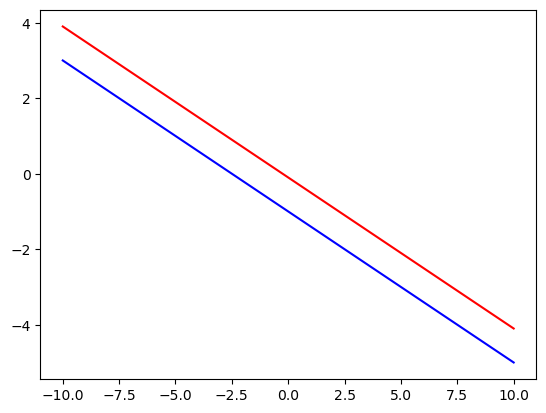

In [54]:
plt.plot(x1_range, hyperplane1, label='5 + 2x1 + 5x2 = 0', color='blue')
plt.plot(x1_range, hyperplane2, label='5 + 20x1 + 50x2 = 0', color='red')


In [55]:
x1, x2 = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

In [56]:
inequality1 = 5 + 2 * x1 + 5 * x2
inequality2 = 5 + 20 * x1 + 50 * x2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


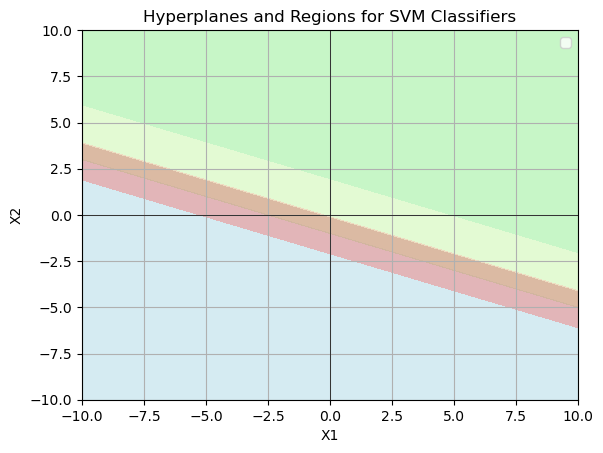

In [57]:

plt.contourf(x1, x2, inequality1, levels=[-100, 0], colors='lightblue', alpha=0.5)
plt.contourf(x1, x2, inequality1, levels=[0, 100], colors='lightgreen', alpha=0.5)

plt.contourf(x1, x2, inequality2, levels=[-100, 0], colors='lightcoral', alpha=0.5)
plt.contourf(x1, x2, inequality2, levels=[0, 100], colors='lightyellow', alpha=0.5)

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Hyperplanes and Regions for SVM Classifiers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()
